<a href="https://colab.research.google.com/github/Engineering-Mohammed-Almagidi/Deep-Learning-Basics/blob/master/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1


In [6]:
!pip install tensorflow

# استيراد المكتبات الأساسية
import numpy as np  # لمعالجة الأعداد
import pandas as pd  # لمعالجة البيانات (CSV، إلخ)
import matplotlib.pyplot as plt  # للرسم البياني
import PIL  # لمعالجة الصور
from sklearn.model_selection import train_test_split  # لتقسيم البيانات

# استيراد الطبقات المطلوبة لبناء النموذج
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # تم التغيير إلى المسار الجديد
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

import warnings
warnings.filterwarnings('ignore')  # تجاهل التحذيرات

# البحث عن الملفات في المسار المحدد
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  # طباعة مسارات الملفات


In [7]:
import os

# تحديد المسار الصحيح
root_path = '/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/'

# التحقق من وجود المجلد
if os.path.exists(root_path):
    print("المجلد موجود.")

    # التكرار على الفئات في المجلد
    for class_name in os.listdir(root_path):
        class_path = os.path.join(root_path, class_name)  # إنشاء المسار الكامل للفئة
        if os.path.isdir(class_path):  # التأكد من أنه مجلد
            for path in os.listdir(class_path):
                # يمكنك هنا إضافة أي معالجة للصور أو البيانات
                print(f"معالجة الصورة: {path} في الفئة {class_name}")
        else:
            print(f"{class_name} ليس مجلدًا.")
else:
    print("المجلد غير موجود.")


Streaming output truncated to the last 5000 lines.
معالجة الصورة: 9698.jpg في الفئة Dog
معالجة الصورة: 9067.jpg في الفئة Dog
معالجة الصورة: 5506.jpg في الفئة Dog
معالجة الصورة: 9261.jpg في الفئة Dog
معالجة الصورة: 4007.jpg في الفئة Dog
معالجة الصورة: 6020.jpg في الفئة Dog
معالجة الصورة: 6481.jpg في الفئة Dog
معالجة الصورة: 1809.jpg في الفئة Dog
معالجة الصورة: 9041.jpg في الفئة Dog
معالجة الصورة: 5047.jpg في الفئة Dog
معالجة الصورة: 1404.jpg في الفئة Dog
معالجة الصورة: 8139.jpg في الفئة Dog
معالجة الصورة: 4351.jpg في الفئة Dog
معالجة الصورة: 7346.jpg في الفئة Dog
معالجة الصورة: 3846.jpg في الفئة Dog
معالجة الصورة: 10140.jpg في الفئة Dog
معالجة الصورة: 3593.jpg في الفئة Dog
معالجة الصورة: 8977.jpg في الفئة Dog
معالجة الصورة: 8637.jpg في الفئة Dog
معالجة الصورة: 4639.jpg في الفئة Dog
معالجة الصورة: 6345.jpg في الفئة Dog
معالجة الصورة: 6278.jpg في الفئة Dog
معالجة الصورة: 712.jpg في الفئة Dog
معالجة الصورة: 564.jpg في الفئة Dog
معالجة الصورة: 4036.jpg في الفئة Dog
معالجة الصورة: 9032.jpg ف

In [9]:
import os

# تحديد المسار الصحيح
root_path = '/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/'

# التأكد من أن القوائم فارغة قبل البدء
input_path = []
label = []

# تجوال في المجلدات والملفات لإضافة البيانات
for class_name in os.listdir(root_path):
    class_path = os.path.join(root_path, class_name)

    if os.path.isdir(class_path):  # التأكد من أن المسار هو مجلد
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            input_path.append(image_path)  # إضافة مسار الصورة
            label.append(class_name)  # إضافة اسم الفئة

# التحقق من عدد العناصر في القوائم
if input_path and label:  # التأكد من أن القوائم تحتوي على عناصر
    print(input_path[0], label[0])
else:
    print("القوائم فارغة.")



/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/3283.jpg Cat


In [10]:
len(input_path), len(label)


(24998, 24998)

In [11]:
df = pd.DataFrame({"Images_path": input_path,"Label": label})
df['Label'] = df['Label'].astype('str')
df.head()

,Images_path,Label
0,/root/.cache/kagglehub/datasets/bhavikjikadara...,Cat
1,/root/.cache/kagglehub/datasets/bhavikjikadara...,Cat
2,/root/.cache/kagglehub/datasets/bhavikjikadara...,Cat
3,/root/.cache/kagglehub/datasets/bhavikjikadara...,Cat
4,/root/.cache/kagglehub/datasets/bhavikjikadara...,Cat


In [12]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1HoXyBzUWaVfsWTUiu14TAdiYJBDNzS2TXgANOh8ztcI#gid=0


In [13]:
for i in df['Images_path']:
    if '.jpg' not in i:
        print(i)

In [14]:
l = []
for image in df['Images_path']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)

In [15]:
l[:5]

[]

In [16]:
# to display grid of images
import random

plt.figure(figsize=(10,10))
temp = df[df['Label']==1]['Images_path']
start = random.randint(0, len(temp))
print(start)
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(2,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

0


<Figure size 1000x1000 with 0 Axes>

In [17]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['Label']==0]['Images_path']
start = random.randint(0, len(temp))
files = temp[start:start+10]

for index, file in enumerate(files):
    plt.subplot(2,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [18]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [19]:
# training data
train_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation generator
val_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [20]:
# train and validation iterator
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='Images_path',
    y_col='Label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='Images_path',
    y_col='Label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    train_iterator,
    epochs=10,
    validation_data=val_iterator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 879s 22s/step - accuracy: 0.5178 - loss: 0.7125 - val_accuracy: 0.6510 - val_loss: 0.6327
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 884s 21s/step - accuracy: 0.6219 - loss: 0.6480 - val_accuracy: 0.6596 - val_loss: 0.6199
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 893s 22s/step - accuracy: 0.6683 - loss: 0.6125 - val_accuracy: 0.7034 - val_loss: 0.5598
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 909s 21s/step - accuracy: 0.7068 - loss: 0.5689 - val_accuracy: 0.7150 - val_loss: 0.5516
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 883s 21s/step - accuracy: 0.7114 - loss: 0.5533 - val_accuracy: 0.7090 - val_loss: 0.5642
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 891s 22s/step - accuracy: 0.7277 - loss: 0.5353 - val_accuracy: 0.7412 - val_loss: 0.5247
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 893s 22s/step - accuracy: 0.7593 - loss: 0.5017 - val_accuracy: 0.7692 - val_loss: 0.4896
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 903s 21s/step - accuracy: 0.7738 - loss: 0.4689 - val_accuracy: 0.

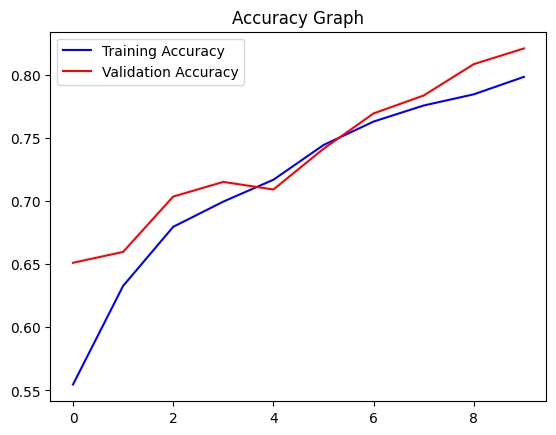

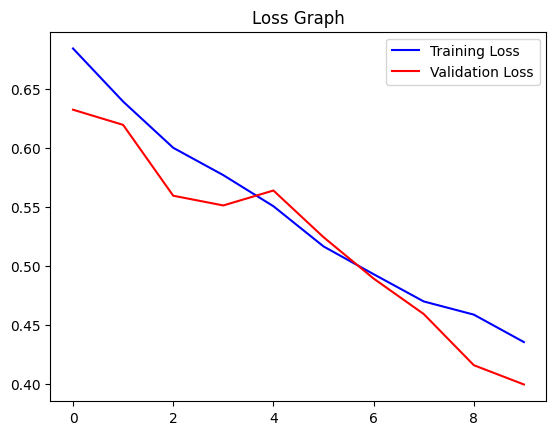

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()